# Benchmark acccuracy

In [1]:
%matplotlib widget
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from matplotlib import pyplot as plt 
import numpy as np 

import pyMOE as moe 
from pyMOE.generate import *  
from pyMOE.propagate import * 
from pyMOE.importing import *

import gdspy
import pya

import time 
import os 

from scipy import interpolate
from scipy.constants import micro, nano, milli

import matplotlib.gridspec as gridspec

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:

import matplotlib as mpl
#plt.style.use(['fivethirtyeight', 'dark_background'])
#plt.style.use('normal')
mpl.rcParams.update(mpl.rcParamsDefault)

#\pgfplotsset{/pgfplots/group/.cd, horizontal sep=0.5cm, vertical sep=0.5cm}
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}


from matplotlib.ticker import MaxNLocator
#mpl.pyplot.tick_params(direction="in", which="both",labelsize=18)
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))



 Circular Aperture
Progress: [####################] 100.0%
Elapsed: 0:00:14.907426


/tmp/ipykernel_2162/4277274159.py:64: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xp1*1e6,yp1*1e6,np.angle(Em)/np.max(np.angle(Em)) )
/tmp/ipykernel_2162/4277274159.py:82: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xp1*1e6,yp1*1e6,np.abs(z1)**2 , vmin=0, vmax=np.max(np.abs(z1)**2))
/tmp/ipykernel_2162/4277274159.py:99: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated sinc

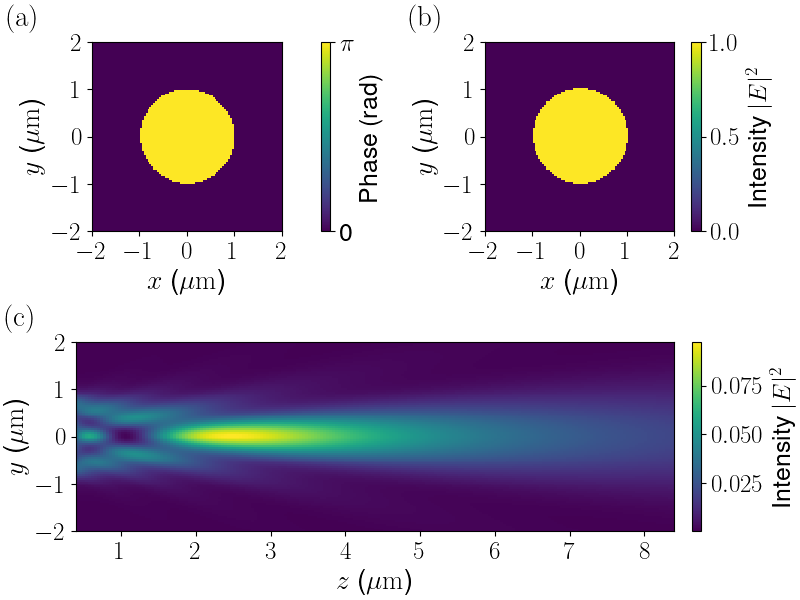


 Circular Aperture propagation


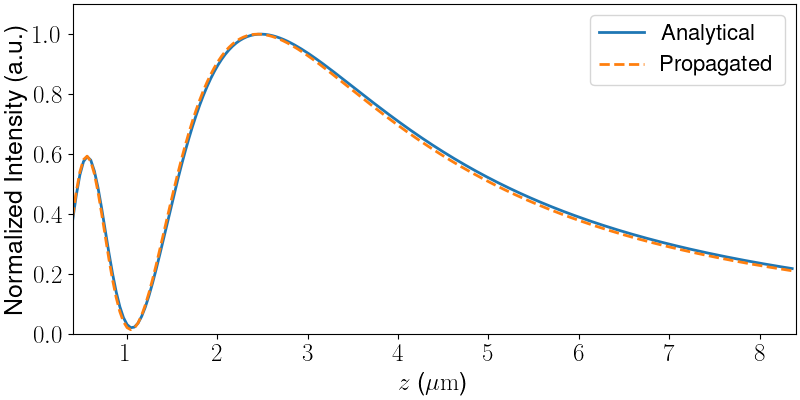

/tmp/ipykernel_2162/4277274159.py:177: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


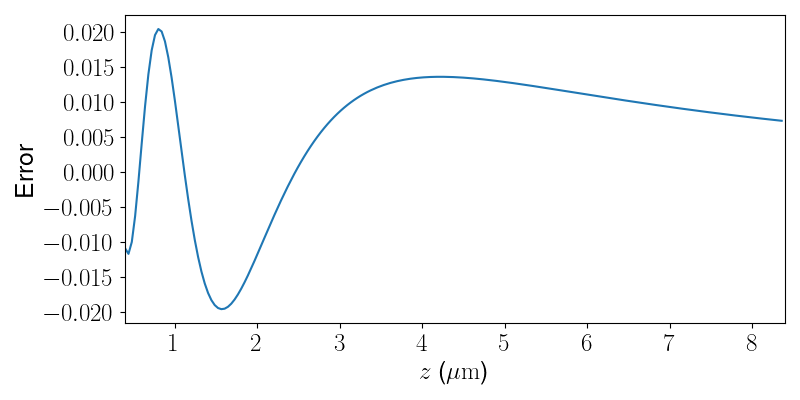

In [3]:
##############################################################################################################
### Circular aperture Figure 

print("\n Circular Aperture")

npix = 100
lda = 400e-9 #m
zdist = 300*lda #m

rd = 1000e-9 #m 
E0=1 
 
pixsize = 0.1 * lda
 
xsiz = npix*pixsize
ysiz = npix*pixsize

partial = rd/(pixsize * npix)

mask = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)

# Create circular aperture on mask

center = (-xsiz/npix/2, -ysiz/npix/2) 
mask = moe.generate.circular_aperture(mask, radius=partial*xsiz, center=center )


fmask = mask.aperture
Em = E0 * np.exp(1.0j*fmask)
Em[mask.XX**2+mask.YY**2>(partial*xsiz)**2]=0 

####Propagate field and calculate in plane YZ, using npix bins in Y
zmin = lda 
zmax = 0.07*zdist
nzs = 200
xplus = xsiz/2
xminus = -xplus  

RS_results = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, npix, xplus, xplus, lda,1,verbose=True)
field = RS_results[0] ##E field 

zp = np.linspace(zmin,zmax,nzs)
yp = np.linspace(xminus,xplus,npix)
z = field

z1 = Em
xp1 = np.linspace(xminus,xplus,z1.shape[0])
yp1 = np.linspace(xminus,xplus,z1.shape[1])


#### START GRID FIGURE 

plt.rcParams['figure.constrained_layout.use'] = True
fig = plt.figure() 

gridspec.GridSpec(2,2)

#### ### FIRST GRID PLOT

plt.subplot2grid((4,4),(0,0), colspan=2, rowspan=2)

plt.title('$\mathrm{(a)}$', loc='left', fontsize=21, x=-0.45, y =1.04)

plt.pcolormesh(xp1*1e6,yp1*1e6,np.angle(Em)/np.max(np.angle(Em)) ) 
cb = plt.colorbar(ticks=[0,1],  orientation="vertical", pad=-0.1) 
cb.set_label(label='Phase (rad) ',size=18)
cb.ax.set_yticklabels([0, '$\pi$' ]) 
cb.ax.tick_params(labelsize=18)

plt.axis('square')
plt.xlabel('$x$ ($\mathrm{\mu m}$)', fontsize = 20)
plt.ylabel('$y$ ($\mathrm{\mu m}$)', fontsize = 20)
plt.xticks([-2,-1,0,1,2],fontsize=18)
plt.yticks([-2,-1,0,1,2],fontsize=18)

#### ### SECOND GRID PLOT

plt.subplot2grid((4,4),(0,2), colspan=2, rowspan=2)

plt.title('$\mathrm{(b)}$', loc='left', fontsize=21, x=-0.4, y =1.04)

plt.pcolormesh(xp1*1e6,yp1*1e6,np.abs(z1)**2 , vmin=0, vmax=np.max(np.abs(z1)**2)) 

plt.axis('square')
plt.xlabel('$x$ ($\mathrm{\mu m}$)', fontsize = 20)
plt.ylabel('$y$ ($\mathrm{\mu m}$)', fontsize = 20)
plt.xticks([-2,-1,0,1,2],fontsize=18)
plt.yticks([-2,-1,0,1,2],fontsize=18)
cb = plt.colorbar(orientation="vertical")
cb.set_label(label='Intensity $|E|^2$',size=18)
cb.ax.tick_params(labelsize=18)

#### ### THIRD GRID PLOT

plt.subplot2grid((4,4),(2,0), colspan=4, rowspan=2)

plt.title('$\mathrm{(c)}$', loc='left', fontsize=21, x=-0.12, y =1.04)

plt.pcolormesh(zp*1e6,yp*1e6,np.abs(z)**2)

plt.xlabel('$z$ ($\mathrm{\mu m}$)', fontsize = 20)
plt.ylabel('$y$ ($\mathrm{\mu m}$)', fontsize = 20)
plt.yticks([-2,-1,0,1,2],fontsize=18)
plt.xticks(fontsize=18)
cb = plt.colorbar(pad=0.02)
cb.set_label(label='Intensity $|E|^2$',size=18)
cb.ax.tick_params(labelsize=18)

fig.set_size_inches(w=8,h=6)

#plt.savefig("../results/Fig14.png")
plt.savefig("Fig14.png")
plt.show()

##############################################################################################################
### Circular aperture propagation Figure 

print("\n Circular Aperture propagation")
    
ivals_zz24 = moe.propagate.circ_zz24(partial*xsiz, zp, lda)

yz_cut = np.abs(z[int(len(yp)/2)][:])**2


plt.rcParams['figure.constrained_layout.use'] = True
fig = plt.figure() 

import matplotlib.gridspec as gridspec

gridspec.GridSpec(4,2)

plt.subplot2grid((2,2),(0,0), colspan=2, rowspan=2)

plt.xlabel('$z$ ($\mathrm{\mu m}$)', fontsize = 18)
plt.ylabel('Normalized Intensity (a.u.)', fontsize = 18)


plt.plot(zp[:-1]*1e6, ivals_zz24[:-1]/np.max(ivals_zz24), label="Analytical", lw=2)
plt.plot(zp[:-1]*1e6, yz_cut[:-1]/np.max(yz_cut) , '--', label="Propagated", lw=2)

plt.xlim([np.min(zp*1e6), np.max(zp*1e6)])
plt.ylim([0,1.1])

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_size_inches(w=8,h=4)
plt.legend(fontsize=16)

plt.show()

#plt.savefig("../results/Fig15.png")
plt.savefig("Fig15.png")



fig = plt.figure()

gridspec.GridSpec(4,2)

plt.subplot2grid((2,2),(0,0), colspan=2, rowspan=2)

plt.xlabel('$z$ ($\mathrm{\mu m}$)', fontsize = 18)
plt.ylabel('Error', fontsize = 18)


errors = ivals_zz24[:-1]/np.max(ivals_zz24) - yz_cut[:-1]/np.max(yz_cut) 
plt.plot(zp[:-1]*1e6, errors)

plt.xlim([np.min(zp*1e6), np.max(zp*1e6)])
#plt.ylim([0,1.1])

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_size_inches(w=8,h=4)
plt.tight_layout()

plt.show()



 Circular Aperture


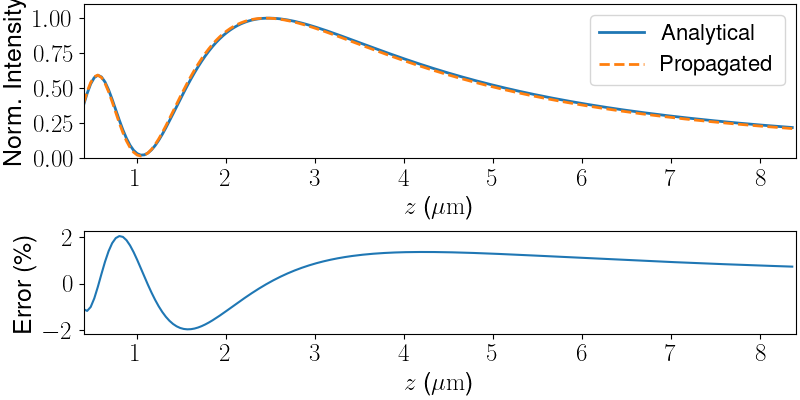

In [4]:
##############################################################################################################
### Circular aperture Figure 

print("\n Circular Aperture")

npix = 101
lda = 400e-9 #m
zdist = 300*lda #m

rd = 1000e-9 #m 
E0=1 
 
pixsize = 0.1 * lda
 
xsiz = npix*pixsize
ysiz = npix*pixsize

partial = rd/(pixsize * npix)

mask = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)

# Create circular aperture on mask

center = (-xsiz/npix/2, -ysiz/npix/2) 
mask = moe.generate.circular_aperture(mask, radius=partial*xsiz, center=center )


fmask = mask.aperture
Em = E0 * np.exp(1.0j*fmask)
Em[mask.XX**2+mask.YY**2>(partial*xsiz)**2]=0 

    
ivals_zz24 = moe.propagate.circ_zz24(partial*xsiz, zp, lda)

yz_cut = np.abs(z[int(len(yp)/2)][:])**2


plt.rcParams['figure.constrained_layout.use'] = True
fig = plt.figure() 

import matplotlib.gridspec as gridspec

gridspec.GridSpec(5,4)

plt.subplot2grid((5,4),(0,0), colspan=4, rowspan=3)

plt.xlabel('$z$ ($\mathrm{\mu m}$)', fontsize = 18)
plt.ylabel('Norm. Intensity', fontsize = 18)


plt.plot(zp[:-1]*1e6, ivals_zz24[:-1]/np.max(ivals_zz24), label="Analytical", lw=2)
plt.plot(zp[:-1]*1e6, yz_cut[:-1]/np.max(yz_cut) , '--', label="Propagated", lw=2)

plt.xlim([np.min(zp*1e6), np.max(zp*1e6)])
plt.ylim([0,1.1])

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_size_inches(w=8,h=4)
plt.legend(fontsize=16)
#plt.tight_layout()


plt.subplot2grid((5,4),(3,0), colspan=4, rowspan=2)

plt.xlabel('$z$ ($\mathrm{\mu m}$)', fontsize = 18)
plt.ylabel('Error (\%)', fontsize = 18)


errors = ivals_zz24[:-1]/np.max(ivals_zz24) - yz_cut[:-1]/np.max(yz_cut) 
plt.plot(zp[:-1]*1e6, errors*100)

plt.xlim([np.min(zp*1e6), np.max(zp*1e6)])
#plt.ylim([0,1.1])

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_size_inches(w=8,h=4)
#plt.tight_layout()

plt.show()



 Circular Aperture


../../pyMOE/plotting.py:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = plt.pcolormesh(field.x/scale_factor, field.y/scale_factor, field.amplitude,)
../../pyMOE/plotting.py:152: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = plt.pcolormesh(field.x/scale_factor, field.y/scale_factor, field.phase)
../../pyMOE/plotting.py:166: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; 

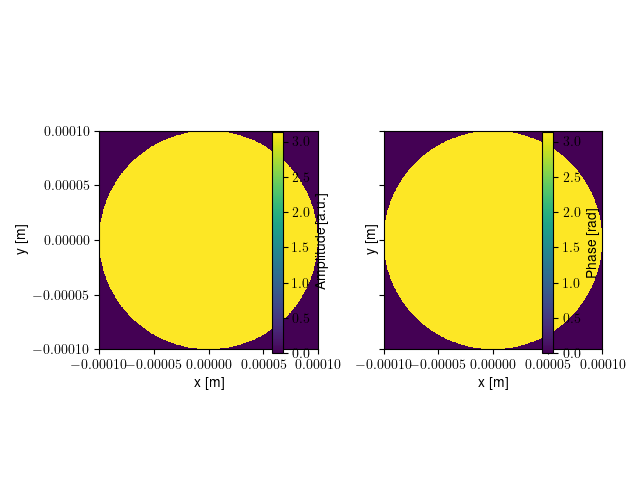

[########################################] | 100% Completed | 4.76 sms


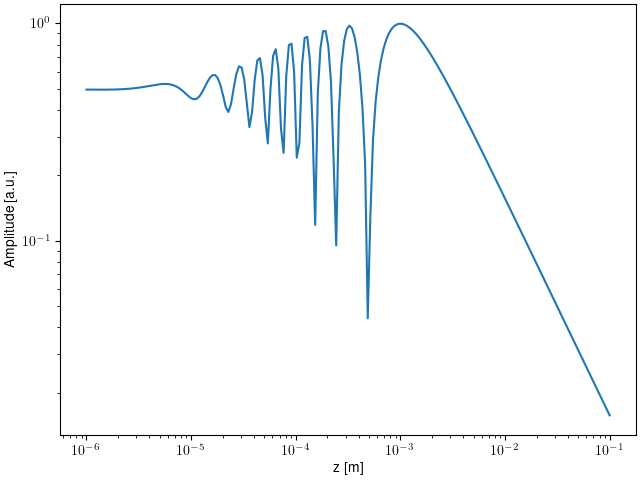

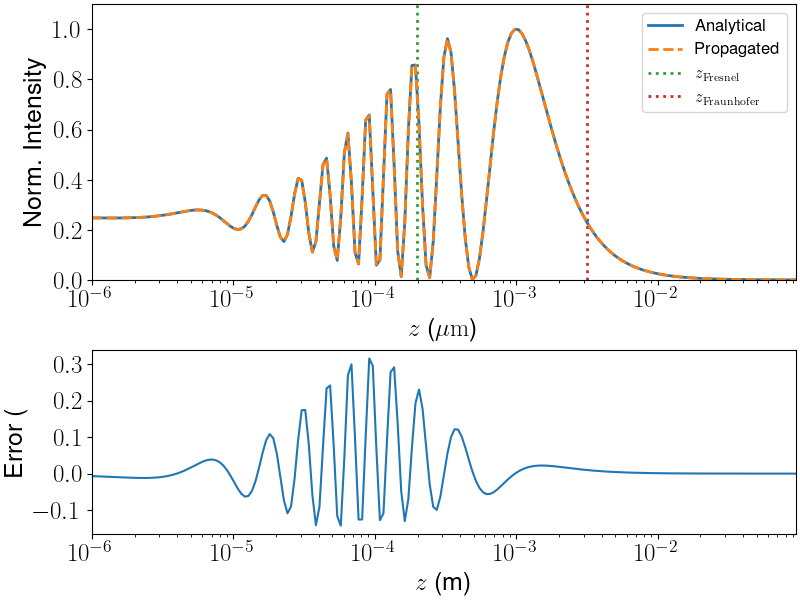

In [5]:
##############################################################################################################
### Circular aperture Figure 


###Gillen 2004
print("\n Circular Aperture")

npix = 512
lda = 10e-6 #m
zdist = 300*lda #m

rd = 100e-6 #m 
E0=1 
 
pixsize = 0.1 * lda
 
xsiz = rd*2
ysiz = rd*2

fraun = moe.propagate.Fraunhofer_criterion(lda,rd)
fresnel = moe.propagate.Fresnel_criterion(lda,rd)

mask = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
pixelx = mask.pixel_x
pixely = mask.pixel_y
# Create circular aperture on mask

#center = (0,0) 
center = (-pixelx/2, -pixely/2) 
mask = moe.generate.circular_aperture(mask, radius=rd, center=center )
mask_phase = moe.generate.circular_aperture(mask, radius=rd, center=center )

mask_phase.aperture = mask.aperture * np.pi 

# Generate a uniform field
field = moe.field.create_empty_field_from_aperture(mask)
field = moe.field.generate_uniform_field(field, E0=1)

# Modulates the field 
field = moe.field.modulate_field(field, amplitude_mask=mask, phase_mask=mask_phase)

# Plots the field (amplitude and phase)
moe.plotting.plot_field(field)

plt.tight_layout()
plt.show()

##Propagate field in plane XY at z_distance

zmin = 0.01*rd
zmax = 1000*rd
nzs = 200


# Propagates the field in a single line along the Z axis
screen_ZZ = moe.field.create_screen_ZZ(np.log10(zmin), np.log10(zmax),nzs, log=True)

#screen_ZZ.z = np.logspace(-2, 7,900)*2*rd

screen_ZZ = moe.propagate.RS_integral(field, screen_ZZ, lda, parallel_computing=True, simp2d=True)
moe.plotting.plot_screen_ZZ(screen_ZZ, which='amplitude')
plt.xscale('log')
plt.yscale('log')
plt.show()

zp = screen_ZZ.z
ivals_zz24 = moe.propagate.circ_zz24(rd, zp, lda)

yz_cut = screen_ZZ.amplitude[0][0]**2


plt.rcParams['figure.constrained_layout.use'] = True


#zp = zp/rd

fig = plt.figure() 

import matplotlib.gridspec as gridspec

gridspec.GridSpec(5,4)

plt.subplot2grid((5,4),(0,0), colspan=4, rowspan=3)

plt.xlabel('$z$ ($\mathrm{\mu m}$)', fontsize = 18)
plt.ylabel('Norm. Intensity', fontsize = 18)


plt.plot(zp[:-1], ivals_zz24[:-1]/np.max(ivals_zz24), label="Analytical", lw=2)
plt.xlim([np.min(zp[:-1]), np.max(zp[:-1])])
plt.plot(zp[:-1], yz_cut[:-1]/np.max(yz_cut)  , '--', label="Propagated", lw=2)
plt.xscale('log')
#plt.yscale('log')

#plt.xlim([np.log10(zmin), np.log10(zmax)])
plt.ylim([0,1.1])

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_size_inches(w=8,h=4)

#plt.tight_layout()

plt.vlines([fresnel], 0,1.1,label=r'$z_{\mathrm{Fresnel}}$', color='C2', ls='dotted', lw=2)
plt.vlines([fraun], 0,1.1,label='$z_{\mathrm{Fraunhofer}}$', color='C3', ls='dotted', lw=2)
plt.legend(fontsize=12)

plt.subplot2grid((5,4),(3,0), colspan=4, rowspan=2)

plt.xlabel('$z$ (m) ', fontsize = 18)
plt.ylabel('Error (%)', fontsize = 18)


errors = ivals_zz24[:-1]/np.max(ivals_zz24) - yz_cut[:-1]/np.max(yz_cut) 
plt.plot(zp[:-1], errors*100)
plt.xscale('log')
#plt.yscale('log')

plt.xlim([np.min(zp[:-1]), np.max(zp[:-1])])
#plt.ylim([0,1.1])


plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_size_inches(w=8,h=6)
#plt.tight_layout()

plt.show()


 Circular Aperture


../../pyMOE/plotting.py:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = plt.pcolormesh(field.x/scale_factor, field.y/scale_factor, field.amplitude,)
../../pyMOE/plotting.py:152: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = plt.pcolormesh(field.x/scale_factor, field.y/scale_factor, field.phase)
../../pyMOE/plotting.py:166: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; 

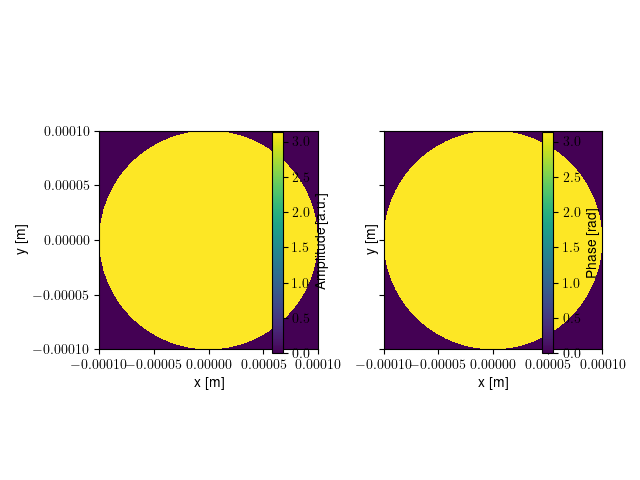

[########################################] | 100% Completed | 438.90 s


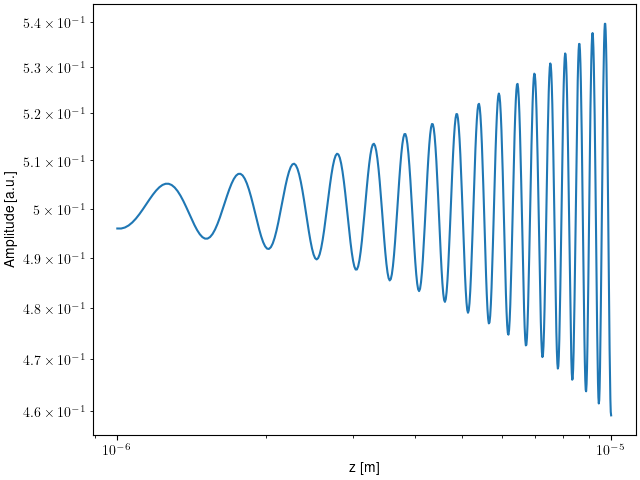

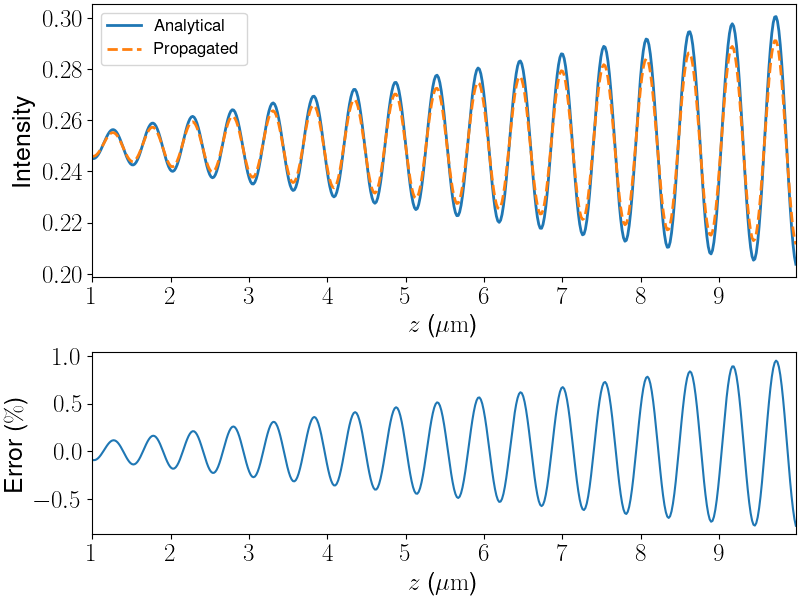

In [6]:
##############################################################################################################
### Circular aperture Figure 


###Harvey 2022
print("\n Circular Aperture")

npix = 2048
lda = 0.5e-6 #m
zdist = 300*lda #m

rd = 0.1e-3 #m 
E0=1 
 
pixsize = 0.1 * lda
 
xsiz = rd*2
ysiz = rd*2

fraun = moe.propagate.Fraunhofer_criterion(lda,rd)
fresnel = moe.propagate.Fresnel_criterion(lda,rd)

mask = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
pixelx = mask.pixel_x
pixely = mask.pixel_y
# Create circular aperture on mask

#center = (0,0) 
center = (-pixelx/2, -pixely/2) 
mask = moe.generate.circular_aperture(mask, radius=rd, center=center )
mask_phase = moe.generate.circular_aperture(mask, radius=rd, center=center )

mask_phase.aperture = mask.aperture * np.pi 

# Generate a uniform field
field = moe.field.create_empty_field_from_aperture(mask)
field = moe.field.generate_uniform_field(field, E0=1)

# Modulates the field 
field = moe.field.modulate_field(field, amplitude_mask=mask, phase_mask=mask_phase)

# Plots the field (amplitude and phase)
moe.plotting.plot_field(field)

plt.tight_layout()
plt.show()

##Propagate field in plane XY at z_distance

zmin = 0.01*rd
zmax = 0.01e-3
nzs = 500


# Propagates the field in a single line along the Z axis
screen_ZZ = moe.field.create_screen_ZZ(zmin, zmax,nzs, log=False)

#screen_ZZ.z = np.logspace(-2, 7,900)*2*rd

screen_ZZ = moe.propagate.RS_integral(field, screen_ZZ, lda, parallel_computing=True, simp2d=True)
moe.plotting.plot_screen_ZZ(screen_ZZ, which='amplitude')
plt.xscale('log')
plt.yscale('log')
plt.show()


zp = screen_ZZ.z
ivals_zz24 = moe.propagate.circ_zz24(rd, zp, lda)

yz_cut = screen_ZZ.amplitude[0][0]**2


plt.rcParams['figure.constrained_layout.use'] = True


#zp = zp/rd
fig = plt.figure() 

import matplotlib.gridspec as gridspec

gridspec.GridSpec(5,4)

plt.subplot2grid((5,4),(0,0), colspan=4, rowspan=3)

plt.xlabel('$z$ ($\mathrm{\mu m}$)', fontsize = 18)
plt.ylabel('Intensity', fontsize = 18)


plt.plot(zp[:-1]*1e6, ivals_zz24[:-1], label="Analytical", lw=2)
plt.xlim([np.min(zp[:-1]*1e6), np.max(zp[:-1]*1e6)])
plt.plot(zp[:-1]*1e6, yz_cut[:-1]  , '--', label="Propagated", lw=2)
#plt.xscale('log')
#plt.yscale('log')

#plt.xlim([np.log10(zmin), np.log10(zmax)])
#plt.ylim([0.8,1.3])

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_size_inches(w=8,h=4)

#plt.tight_layout()

#plt.vlines([fresnel], 0,1.1,label=r'$z_{\mathrm{Fresnel}}$', color='C2', ls='dotted', lw=2)
#plt.vlines([fraun], 0,1.1,label='$z_{\mathrm{Fraunhofer}}$', color='C3', ls='dotted', lw=2)
plt.legend(fontsize=12)

plt.subplot2grid((5,4),(3,0), colspan=4, rowspan=2)

plt.xlabel('$z$ ($\mathrm{\mu m}$) ', fontsize = 18)
plt.ylabel('Error ($\%$)', fontsize = 18)


errors = ivals_zz24[:-1] - yz_cut[:-1]
plt.plot(zp[:-1]*1e6, errors*100)
#plt.xscale('log')
#plt.yscale('log')

plt.xlim([np.min(zp[:-1]*1e6), np.max(zp[:-1]*1e6)])
#plt.ylim([0,1.1])


plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_size_inches(w=8,h=6)
#plt.tight_layout()

plt.show()


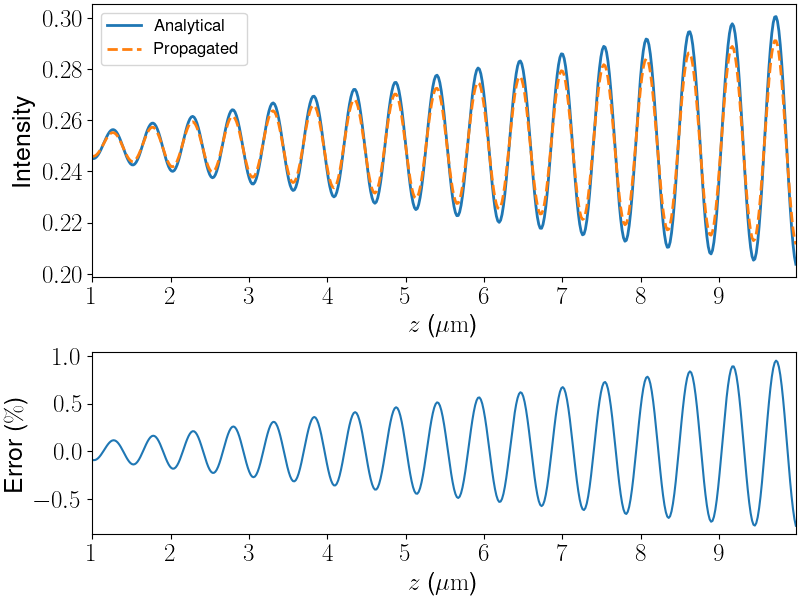

In [7]:
#zp = zp/rd
fig = plt.figure() 

import matplotlib.gridspec as gridspec

gridspec.GridSpec(5,4)

plt.subplot2grid((5,4),(0,0), colspan=4, rowspan=3)

plt.xlabel('$z$ ($\mathrm{\mu m}$)', fontsize = 18)
plt.ylabel('Intensity', fontsize = 18)


plt.plot(zp[:-1]*1e6, ivals_zz24[:-1], label="Analytical", lw=2)
plt.xlim([np.min(zp[:-1]*1e6), np.max(zp[:-1]*1e6)])
plt.plot(zp[:-1]*1e6, yz_cut[:-1]  , '--', label="Propagated", lw=2)
#plt.xscale('log')
#plt.yscale('log')

#plt.xlim([np.log10(zmin), np.log10(zmax)])
#plt.ylim([0.8,1.3])

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_size_inches(w=8,h=4)

#plt.tight_layout()

#plt.vlines([fresnel], 0,1.1,label=r'$z_{\mathrm{Fresnel}}$', color='C2', ls='dotted', lw=2)
#plt.vlines([fraun], 0,1.1,label='$z_{\mathrm{Fraunhofer}}$', color='C3', ls='dotted', lw=2)
plt.legend(fontsize=12)

plt.subplot2grid((5,4),(3,0), colspan=4, rowspan=2)

plt.xlabel('$z$ ($\mathrm{\mu m}$) ', fontsize = 18)
plt.ylabel('Error ($\%$)', fontsize = 18)


errors = ivals_zz24[:-1] - yz_cut[:-1]
plt.plot(zp[:-1]*1e6, errors*100)
#plt.xscale('log')
#plt.yscale('log')

plt.xlim([np.min(zp[:-1]*1e6), np.max(zp[:-1]*1e6)])
#plt.ylim([0,1.1])


plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_size_inches(w=8,h=6)
#plt.tight_layout()

plt.show()

In [8]:
npixs =np.array([16, 64, 128, 512, 1024])

pixsiz = xsiz/npixs 
pixsiz>lda

array([ True,  True,  True, False, False])


 Circular Aperture
[########################################] | 100% Completed | 415.08 ms
[########################################] | 100% Completed | 619.38 ms
[########################################] | 100% Completed | 722.01 ms
[########################################] | 100% Completed | 7.33 sms


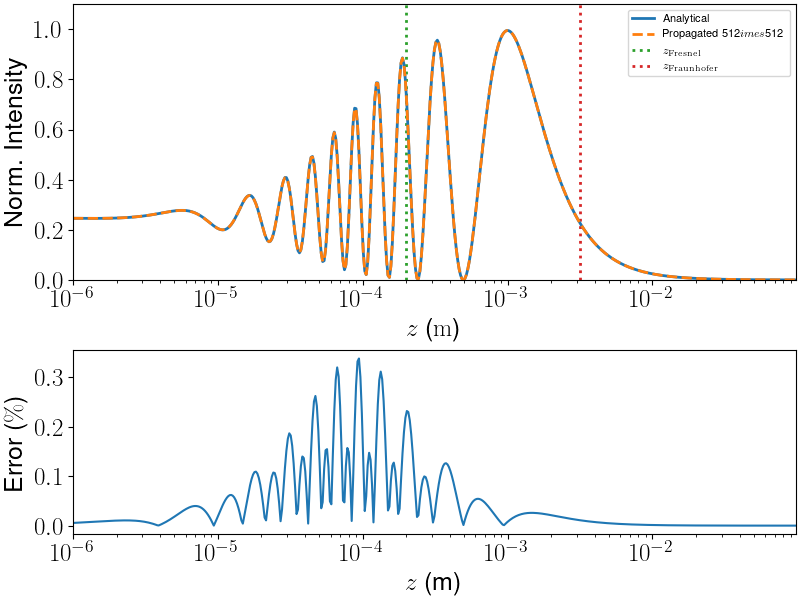

In [9]:
##############################################################################################################
### Circular aperture Figure 


###Gillen 2004
print("\n Circular Aperture")

npix = 512
lda = 10e-6 #m
zdist = 300*lda #m

rd = 100e-6 #m 
E0=1 
 
pixsize = 0.1 * lda
 
xsiz = rd*2
ysiz = rd*2

fraun = moe.propagate.Fraunhofer_criterion(lda,rd)
fresnel = moe.propagate.Fresnel_criterion(lda,rd)

zmin = 0.01*rd
zmax = 1000*rd
nzs = 500

npixs =np.array([16, 64, 128, 512])

pixsiz = xsiz/npixs 
pixsiz>lda

values = np.zeros((len(npixs), nzs+1))
values_err = np.zeros((len(npixs), nzs+1))

fig = plt.figure() 

for ip, npix in enumerate(npixs): 

    mask = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
    pixelx = mask.pixel_x
    pixely = mask.pixel_y
    # Create circular aperture on mask

    #center = (0,0) 
    center = (-pixelx/2, -pixely/2) 
    mask = moe.generate.circular_aperture(mask, radius=rd, center=center )
    mask_phase = moe.generate.circular_aperture(mask, radius=rd, center=center )

    mask_phase.aperture = mask.aperture * np.pi 

    # Generate a uniform field
    field = moe.field.create_empty_field_from_aperture(mask)
    field = moe.field.generate_uniform_field(field, E0=1)

    # Modulates the field 
    field = moe.field.modulate_field(field, amplitude_mask=mask, phase_mask=mask_phase)

    # Propagates the field in a single line along the Z axis
    screen_ZZ = moe.field.create_screen_ZZ(np.log10(zmin), np.log10(zmax),nzs, log=True)

    #screen_ZZ.z = np.logspace(-2, 7,900)*2*rd

    screen_ZZ = moe.propagate.RS_integral(field, screen_ZZ, lda, parallel_computing=True, simp2d=True)
    #moe.plotting.plot_screen_ZZ(screen_ZZ, which='amplitude')
    #plt.xscale('log')
    #plt.yscale('log')
    #plt.show()


    zp = screen_ZZ.z
    ivals_zz24 = moe.propagate.circ_zz24(rd, zp, lda)

    yz_cut = screen_ZZ.amplitude[0][0]**2


    values[ip][0:len(yz_cut)] = yz_cut
    
    plt.rcParams['figure.constrained_layout.use'] = True


    #zp = zp/rd



    import matplotlib.gridspec as gridspec

    gridspec.GridSpec(5,4)

    plt.subplot2grid((5,4),(0,0), colspan=4, rowspan=3)

    plt.xlabel('$z$ ($\mathrm{m}$)', fontsize = 18)
    plt.ylabel('Norm. Intensity', fontsize = 18)

    

    plt.plot(zp[:-1], ivals_zz24[:-1], label="Analytical", lw=2)
    plt.xlim([np.min(zp[:-1]), np.max(zp[:-1])])
    plt.plot(zp[:-1], yz_cut[:-1]  , '--', label="Propagated "+str(npix)+"$\times$"+str(npix), lw=2)
    plt.xscale('log')
    #plt.yscale('log')

    #plt.xlim([np.log10(zmin), np.log10(zmax)])
    plt.ylim([0,1.1])

    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)

    fig.set_size_inches(w=8,h=4)

    #plt.tight_layout()

    plt.vlines([fresnel], 0,1.1,label=r'$z_{\mathrm{Fresnel}}$', color='C2', ls='dotted', lw=2)
    plt.vlines([fraun], 0,1.1,label='$z_{\mathrm{Fraunhofer}}$', color='C3', ls='dotted', lw=2)
    plt.legend(fontsize=8)

    plt.subplot2grid((5,4),(3,0), colspan=4, rowspan=2)

    plt.xlabel('$z$ (m) ', fontsize = 18)
    plt.ylabel('Error ($\%$)', fontsize = 18)


    errors = ivals_zz24[:-1]- yz_cut[:-1]

    plt.plot(zp[:-1], abs(errors)*100)
    plt.xscale('log')
    #plt.yscale('log')

    plt.xlim([np.min(zp[:-1]), np.max(zp[:-1])])
    #plt.ylim([-1e3,1e3])
    

    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    
    values_err[ip][0:len(errors)]  = errors

fig.set_size_inches(w=8,h=6)
#plt.tight_layout()

plt.show()

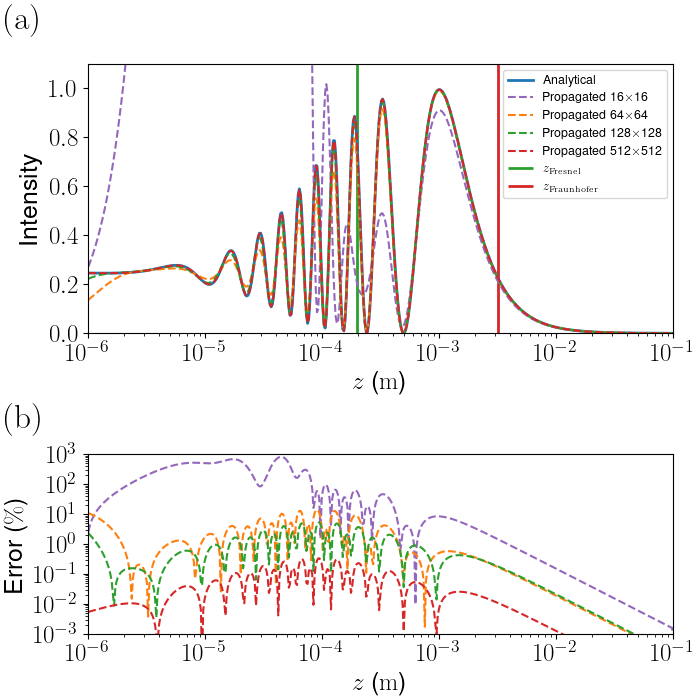

In [10]:
fig = plt.figure()

plt.rcParams['figure.constrained_layout.use'] = True

#zp = zp/rd

import matplotlib.gridspec as gridspec

gridspec.GridSpec(5,4)

plt.subplot2grid((5,4),(0,0), colspan=4, rowspan=3)

plt.title('$\mathrm{(a)}$', loc='left', fontsize=24, x=-0.145, y =1.1)

plt.xlabel('$z$ ($\mathrm{m}$)', fontsize = 18)
plt.ylabel('Intensity', fontsize = 18)

ivals_zz24 = moe.propagate.circ_zz24(rd, zp, lda)

plt.plot(zp, ivals_zz24, label="Analytical", lw=2, color='C0')
plt.xlim([np.min(zp), np.max(zp)])

colorspace = ['C4', 'C1','C2',  'C3']

for ip, npix in enumerate(npixs): 
    plt.plot(zp, values[ip][0:len(zp)], '--', label="Propagated "+str(npix)+r'$ \times $'+str(npix), lw=1.5, color=colorspace[ip])
plt.xscale('log')
#plt.yscale('log')

#plt.xlim([np.log10(zmin), np.log10(zmax)])
plt.ylim([0,1.1])

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_size_inches(w=8,h=4)

#plt.tight_layout()

plt.vlines([fresnel], 0,1.1,label=r'$z_{\mathrm{Fresnel}}$', color='C2',  lw=2)
plt.vlines([fraun], 0,1.1,label='$z_{\mathrm{Fraunhofer}}$', color='C3',  lw=2)
plt.legend(fontsize=9)



plt.subplot2grid((5,4),(3,0), colspan=4, rowspan=2)

plt.title('$\mathrm{(b)}$', loc='left', fontsize=24, x=-0.145, y =1.1)

plt.xlabel('$z$ ($\mathrm{m}$) ', fontsize = 18)
plt.ylabel('Error ($\%$)', fontsize = 18)

for ip, npix in enumerate(npixs): 
    plt.plot(zp, abs(values_err[ip][0:len(zp)]*100), '--',label="Propagated "+str(npix)+r'$ \times $'+str(npix), lw=1.5, color=colorspace[ip])
plt.xscale('log')
plt.yscale('log')

plt.xlim([np.min(zp), np.max(zp)])
plt.ylim([1e-3,1e3])

#plt.legend(fontsize=8)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)


fig.set_size_inches(w=7,h=7)
#plt.tight_layout()

plt.show()



In [11]:
pixsiz/lda

array([1.25     , 0.3125   , 0.15625  , 0.0390625])


 Circular Aperture


../../pyMOE/plotting.py:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = plt.pcolormesh(field.x/scale_factor, field.y/scale_factor, field.amplitude,)
../../pyMOE/plotting.py:152: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = plt.pcolormesh(field.x/scale_factor, field.y/scale_factor, field.phase)
../../pyMOE/plotting.py:166: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; 

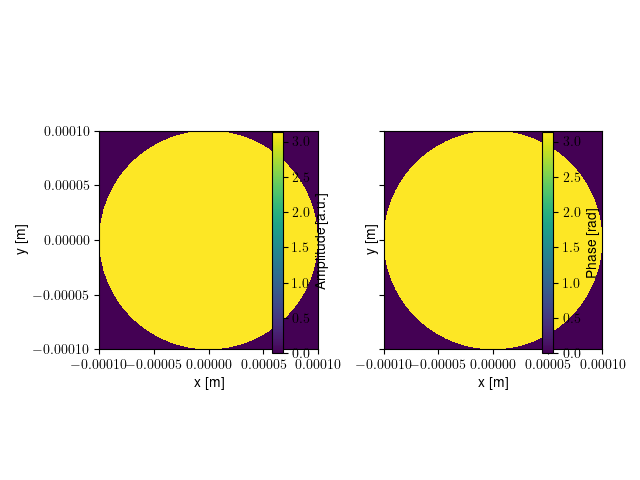

[########################################] | 100% Completed | 30m 18s


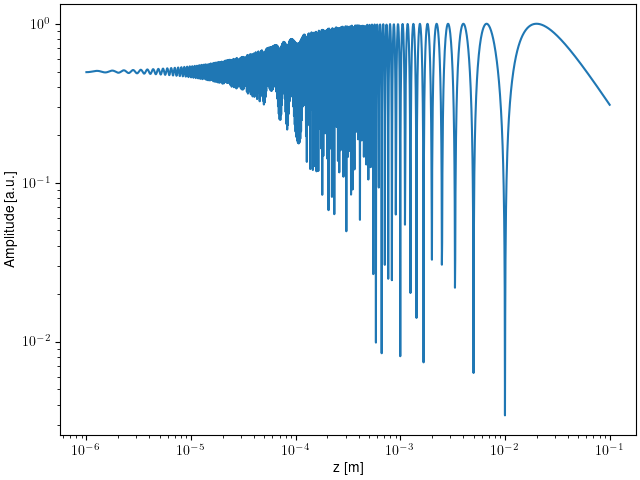

In [12]:
##############################################################################################################
### Circular aperture Figure 


###Harvey 2022
print("\n Circular Aperture")

npix = 2048
lda = 0.5e-6 #m
zdist = 300*lda #m

rd = 0.1e-3 #m 
E0=1 
 
pixsize = 0.1 * lda
 
xsiz = rd*2
ysiz = rd*2

fraun = Fraunhofer_criterion(lda,rd)
fresnel = Fresnel_criterion(lda,rd)

mask = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
pixelx = mask.pixel_x
pixely = mask.pixel_y
# Create circular aperture on mask

#center = (0,0) 
center = (-pixelx/2, -pixely/2) 
mask = moe.generate.circular_aperture(mask, radius=rd, center=center )
mask_phase = moe.generate.circular_aperture(mask, radius=rd, center=center )

mask_phase.aperture = mask.aperture * np.pi 

# Generate a uniform field
field = moe.field.create_empty_field_from_aperture(mask)
field = moe.field.generate_uniform_field(field, E0=1)

# Modulates the field 
field = moe.field.modulate_field(field, amplitude_mask=mask, phase_mask=mask_phase)

# Plots the field (amplitude and phase)
moe.plotting.plot_field(field)

plt.tight_layout()
plt.show()

##Propagate field in plane XY at z_distance

zmin = 0.01*rd
zmax = 1000*rd
nzs = 2000


# Propagates the field in a single line along the Z axis
screen_ZZ = moe.field.create_screen_ZZ(np.log10(zmin), np.log10(zmax),nzs, log=True)

#screen_ZZ.z = np.logspace(-2, 7,900)*2*rd

screen_ZZ = moe.propagate.RS_integral(field, screen_ZZ, lda, parallel_computing=True, simp2d=True)
moe.plotting.plot_screen_ZZ(screen_ZZ, which='amplitude')
plt.xscale('log')
plt.yscale('log')
plt.show()


zp = screen_ZZ.z
ivals_zz24 = moe.propagate.circ_zz24(rd, zp, lda)

yz_cut = screen_ZZ.amplitude[0][0]**2


plt.rcParams['figure.constrained_layout.use'] = True


In [13]:
####USE PREVIOUS IMAGE FOR A PANEL OF IMAGE WITH THE ZOOM

plt.savefig("high-res-zprop.png", dpi=200)

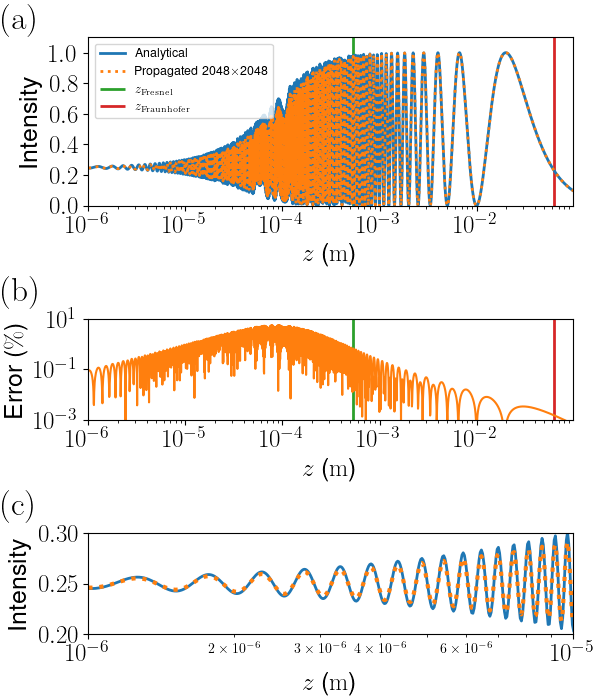

In [14]:
#zp = zp/rd

fig = plt.figure() 

import matplotlib.gridspec as gridspec

gridspec.GridSpec(11,4)

plt.subplot2grid((11,4),(0,0), colspan=4, rowspan=5)

plt.xlabel('$z$ ($\mathrm{m}$)', fontsize = 18)
plt.ylabel('Intensity', fontsize = 18)

plt.title('$\mathrm{(a)}$', loc='left', fontsize=24, x=-0.18, y =1)

plt.plot(zp[:-1], ivals_zz24[:-1], '-', label="Analytical", lw=2)
plt.xlim([np.min(zp[:-1]), np.max(zp[:-1])])
plt.plot(zp[:-1], yz_cut[:-1]  , ls='dotted', label=r"Propagated 2048$\times$2048", lw=2)
plt.xscale('log')
#plt.yscale('log')

#plt.xlim([np.log10(zmin), np.log10(zmax)])
plt.ylim([0,1.1])

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_size_inches(w=8,h=4)

#plt.tight_layout()

plt.vlines([fresnel], 0,1.1,label=r'$z_{\mathrm{Fresnel}}$', color='C2',  lw=2)
plt.vlines([fraun], 0,1.1,label='$z_{\mathrm{Fraunhofer}}$', color='C3', lw=2)

plt.legend(fontsize=9)

plt.subplot2grid((11,4),(5,0), colspan=4, rowspan=3)

plt.xlabel('$z$ ($\mathrm{m}$)', fontsize = 18)
plt.ylabel('Error ($\%$)', fontsize = 18)

plt.title('$\mathrm{(b)}$', loc='left', fontsize=24, x=-0.18, y =1.1)

errors = ivals_zz24[:-1] - yz_cut[:-1]
plt.plot(zp[:-1], abs(errors)*100, color='C1')
plt.xscale('log')
plt.yscale('log')

plt.vlines([fresnel], 1e-3,10,label=r'$z_{\mathrm{Fresnel}}$', color='C2',  lw=2)
plt.vlines([fraun], 1e-3,10,label='$z_{\mathrm{Fraunhofer}}$', color='C3', lw=2)

plt.xlim([np.min(zp[:-1]), np.max(zp[:-1])])
plt.ylim([1e-3,10])


plt.yticks(fontsize=18)
plt.xticks(fontsize=18)


plt.subplot2grid((11,4),(8,0), colspan=4, rowspan=3)

plt.xlabel('$z$ ($\mathrm{m}$)', fontsize = 18)
plt.ylabel('Intensity', fontsize = 18)

plt.title('$\mathrm{(c)}$', loc='left', fontsize=24, x=-0.18, y =1.1)

plt.plot(zp[:-1], ivals_zz24[:-1], '-', label="Analytical", lw=2)
plt.xlim([np.min(zp[:-1]), np.max(zp[:-1])])
plt.plot(zp[:-1], yz_cut[:-1]  , ls='dotted', label=r"Propagated 2048$\times$2048", lw=3)
plt.xscale('log')

#plt.vlines([fresnel], 1e-3,10,label=r'$z_{\mathrm{Fresnel}}$', color='C2',  lw=2)
#plt.vlines([fraun], 1e-3,10,label='$z_{\mathrm{Fraunhofer}}$', color='C3', lw=2)

zmin = 1e-6
zmax = 1e-5

plt.xlim([zmin, zmax])
plt.ylim([0.2,0.3])


plt.yticks(fontsize=18)
plt.xticks(fontsize=18)


fig.set_size_inches(w=6.,h=7)
#plt.tight_layout()

plt.show()



In [15]:
np.savetxt('zp.csv', zp, fmt='%.18e', delimiter=',', newline='\n', header='', footer='', comments='# ', encoding=None) 
np.savetxt('full_inten.csv', ivals_zz24, fmt='%.18e', delimiter=',', newline='\n', header='', footer='', comments='# ', encoding=None)
np.savetxt('errors.csv', errors, fmt='%.18e', delimiter=',', newline='\n', header='', footer='', comments='# ', encoding=None)
np.savetxt('values.csv', yz_cut, fmt='%.18e', delimiter=',', newline='\n', header='', footer='', comments='# ', encoding=None)


In [16]:
zp = np.genfromtxt('zp.csv',  delimiter=',',  encoding=None) 
ivals_zz24 = np.genfromtxt('full_inten.csv',  delimiter=',',  encoding=None)
errors = np.genfromtxt('errors.csv',  delimiter=',', encoding=None)
yz_cut = np.genfromtxt('values.csv',  delimiter=',', encoding=None)

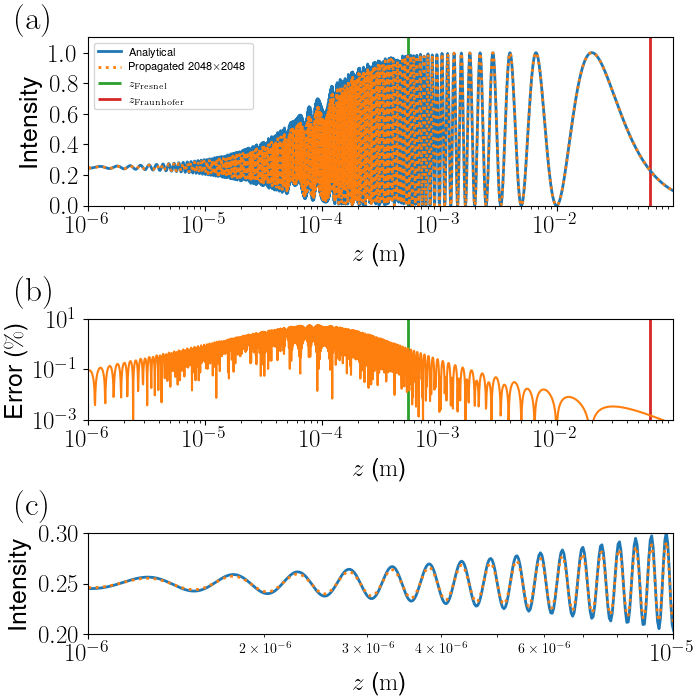

In [17]:
#zp = zp/rd

fig = plt.figure() 

import matplotlib.gridspec as gridspec

gridspec.GridSpec(11,4)

plt.subplot2grid((11,4),(0,0), colspan=4, rowspan=5)

plt.xlabel('$z$ ($\mathrm{m}$)', fontsize = 18)
plt.ylabel('Intensity', fontsize = 18)

plt.title('$\mathrm{(a)}$', loc='left', fontsize=24, x=-0.125, y =1)

plt.plot(zp[:-1], ivals_zz24[:-1], '-', label="Analytical", lw=2)
plt.xlim([np.min(zp[:-1]), np.max(zp[:-1])])
plt.plot(zp[:-1], yz_cut[:-1]  , ls='dotted', label=r"Propagated 2048$\times$2048", lw=2)
plt.xscale('log')
#plt.yscale('log')

#plt.xlim([np.log10(zmin), np.log10(zmax)])
plt.ylim([0,1.1])

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_size_inches(w=8,h=4)

#plt.tight_layout()

plt.vlines([fresnel], 0,1.1,label=r'$z_{\mathrm{Fresnel}}$', color='C2',  lw=2)
plt.vlines([fraun], 0,1.1,label='$z_{\mathrm{Fraunhofer}}$', color='C3', lw=2)

plt.legend(fontsize=8)

plt.subplot2grid((11,4),(5,0), colspan=4, rowspan=3)

plt.xlabel('$z$ ($\mathrm{m}$)', fontsize = 18)
plt.ylabel('Error ($\%$)', fontsize = 18)

plt.title('$\mathrm{(b)}$', loc='left', fontsize=24, x=-0.125, y =1.1)

errors = ivals_zz24[:-1] - yz_cut[:-1]
plt.plot(zp[:-1], abs(errors)*100, color='C1')
plt.xscale('log')
plt.yscale('log')

plt.vlines([fresnel], 1e-3,10,label=r'$z_{\mathrm{Fresnel}}$', color='C2',  lw=2)
plt.vlines([fraun], 1e-3,10,label='$z_{\mathrm{Fraunhofer}}$', color='C3', lw=2)

plt.xlim([np.min(zp[:-1]), np.max(zp[:-1])])
plt.ylim([1e-3,10])


plt.yticks(fontsize=18)
plt.xticks(fontsize=18)


plt.subplot2grid((11,4),(8,0), colspan=4, rowspan=3)

plt.xlabel('$z$ ($\mathrm{m}$)', fontsize = 18)
plt.ylabel('Intensity', fontsize = 18)

plt.title('$\mathrm{(c)}$', loc='left', fontsize=24, x=-0.125, y =1.1)

plt.plot(zp[:-1], ivals_zz24[:-1], '-', label="Analytical", lw=2)
plt.xlim([np.min(zp[:-1]), np.max(zp[:-1])])
plt.plot(zp[:-1], yz_cut[:-1]  , ls='dotted', label=r"Propagated 2048$\times$2048", lw=2)
plt.xscale('log')

#plt.vlines([fresnel], 1e-3,10,label=r'$z_{\mathrm{Fresnel}}$', color='C2',  lw=2)
#plt.vlines([fraun], 1e-3,10,label='$z_{\mathrm{Fraunhofer}}$', color='C3', lw=2)

zmin = 1e-6
zmax = 1e-5

plt.xlim([zmin, zmax])
plt.ylim([0.2,0.3])


plt.yticks(fontsize=18)
plt.xticks(fontsize=18)


fig.set_size_inches(w=7,h=7)
#plt.tight_layout()

plt.show()

